# PCA: Análisis de componentes principales

## Librerias

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## SIAP

### Lectura y visualización de datos

In [132]:
df_pca = pd.read_parquet('../Tidy/SIAP.parquet')

In [133]:
df_pca.sample(10)

,Entidad,Municipio,Superficie Sembrada,Superficie Cosechada,Superficie Siniestrada,Produccion,Rendimiento,Anio,Mes,Cultivo
756011,Oaxaca,Villa de Tututepec de Melchor Ocampo,44.50,44.50,0.0,"1,027.95",23.10,2020,Diciembre,Sandía
958452,Jalisco,Gómez Farías,35.00,35.00,0.0,756.95,21.63,2018,Enero,Alfalfa
613142,Sonora,Guaymas,220.00,98.00,0.0,"3,309.00",33.77,2020,Abril,Tomate rojo (jitomate)
430808,Ciudad de México,Tlalpan,15.00,0.00,0.0,0.00,0,2021,Junio,Calabacita
521421,Jalisco,Chapala,30.50,30.50,0.0,725.90,23.80,2021,Octubre,Tomate rojo (jitomate)
543134,Coahuila,Cuatro Ciénegas,27.50,27.50,0.0,259.88,9.45,2021,Noviembre,Uva
639195,Colima,Cuauhtémoc,21.00,21.00,0.0,109.00,5.19,2020,Junio,Maíz grano
240790,Sonora,Magdalena,122.00,122.00,0.0,"2,890.00",23.69,2022,Julio,Avena forrajera en verde
478536,Quintana Roo,Bacalar,140.00,139.00,0.0,896.75,6.45,2021,Agosto,Naranja
515641,Oaxaca,San José Estancia Grande,263.00,0.00,0.0,0.00,0,2021,Octubre,Maíz grano


In [134]:
missing_values = df_pca.isnull().sum()
missing_values

Entidad                   0
Municipio                 0
Superficie Sembrada       0
Superficie Cosechada      0
Superficie Siniestrada    0
Produccion                0
Rendimiento               0
Anio                      0
Mes                       0
Cultivo                   0
dtype: int64

### Modificación de tipos de dato

In [135]:
df_pca.dtypes

Entidad                    object
Municipio                  object
Superficie Sembrada        object
Superficie Cosechada       object
Superficie Siniestrada    float64
Produccion                 object
Rendimiento                object
Anio                        int64
Mes                        object
Cultivo                    object
dtype: object

La primera observacion que podemos hacer es que las columnas que se suponen son numerables son de tipo objeto. Nuestro proposito es aplicar a estos datos el metodo de reducción de características para visualización llamado "Análisis de componentes principales" o "PCA" el cual utiliza datos de tipo discretos por lo que nuestro proposito es convertir nuestro dataframe a tipo discreto, empezaremos con nuestras columnas que deberian ser flotantes pero son tipo objeto: Superficie Sembrada, Superficie Cosechada, Superficie Siniestrada, Produccion y Rendimiento.

In [136]:
# Lista de variables a convertir
obj_to_float_var = ['Superficie Sembrada', 'Superficie Cosechada', 'Produccion', 'Rendimiento']
# Eliminación de ',' character y conversión a flotante
for var in obj_to_float_var:
    df_pca[var] = df_pca[var].str.replace(',','').astype('float')

In [138]:
df_pca.dtypes

Entidad                    object
Municipio                  object
Superficie Sembrada       float64
Superficie Cosechada      float64
Superficie Siniestrada    float64
Produccion                float64
Rendimiento               float64
Anio                        int64
Mes                        object
Cultivo                    object
dtype: object

### PCA

In [119]:
# Seleccionar solo las columnas de interés
selected_columns = ['Superficie Sembrada', 'Superficie Cosechada', 'Superficie Siniestrada', 'Produccion', 'Rendimiento']
df_selected = df_pca[selected_columns]

# Crear un objeto PCA y ajustarlo a los datos
n_components = 2
pca = PCA(n_components=n_components)

pca.fit(df_selected)

# Obtener las componentes principales y la varianza explicada
principal_components = pca.transform(df_selected)
explained_variance = pca.explained_variance_ratio_

# Crear un nuevo DataFrame con las componentes principales
columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
pca_df = pd.DataFrame(data=principal_components, columns=columns)

# Imprimir el DataFrame con las componentes principales
print(pca_df)

# Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
print(explained_variance)

                 PC1         PC2
0       -7369.034530 -636.683476
1       -7369.133650 -641.024137
2       -7367.482507 -568.717414
3       -7368.935410 -632.342816
4       -7367.012479 -548.134002
...              ...         ...
1154769 -7258.765062 -630.241314
1154770 -7270.836136 -632.655491
1154771 -7365.051624 -642.405839
1154772 -7345.978051 -640.208210
1154773 -7348.078121 -640.147661

[1154774 rows x 2 columns]
Varianza explicada por cada componente principal:
[0.99492654 0.00443579]


Uniremos nuestros dataframes para tenerlo todo en uno y graficar en base a este. Primero validemos que tengan el mismo tamaño para despues proceder a realizar un merge en base al index de estos dos dataframes.

In [122]:
pca_df.shape

(1154774, 2)

In [120]:
df_pca.shape

(1154774, 10)

In [124]:
merged_df = pd.merge(df_pca, pca_df, left_index=True, right_index=True)


In [125]:
merged_df

,Entidad,Municipio,Superficie Sembrada,Superficie Cosechada,Superficie Siniestrada,Produccion,Rendimiento,Anio,Mes,Cultivo,PC1,PC2
0,Aguascalientes,Aguascalientes,8.00,0.0,0.0,0.0,0.00,2023,1,Agave,-7369.034530,-636.683476
1,Baja California Sur,La Paz,3.00,0.0,0.0,0.0,0.00,2023,1,Agave,-7369.133650,-641.024137
2,Colima,Manzanillo,86.29,0.0,0.0,0.0,0.00,2023,1,Agave,-7367.482507,-568.717414
3,Durango,Durango,13.00,0.0,0.0,0.0,0.00,2023,1,Agave,-7368.935410,-632.342816
4,Durango,Mezquital,110.00,0.0,0.0,0.0,0.00,2023,1,Agave,-7367.012479,-548.134002
...,...,...,...,...,...,...,...,...,...,...,...,...
1154769,Puebla,Domingo Arenas,12.00,12.0,0.0,110.0,9.17,2018,12,Zarzamora,-7258.765062,-630.241314
1154770,Puebla,Huejotzingo,10.00,10.0,0.0,98.0,9.80,2018,12,Zarzamora,-7270.836136,-632.655491
1154771,Puebla,Tochimilco,1.00,1.0,0.0,4.1,4.10,2018,12,Zarzamora,-7365.051624,-642.405839
1154772,Querétaro,San Juan del Río,3.00,3.0,0.0,23.1,7.70,2018,12,Zarzamora,-7345.978051,-640.208210


Sustituiremos los valores de la columna *Cultivo* por el ID que se encuentra en el catalogo de cultivos

In [130]:
cat_cultivo = pd.read_csv('../Catalogos_API_SIAP/Cultivo.csv').set_index('Name')['ID']
merged_df['Cultivo'] = merged_df['Cultivo'].map(cat_cultivo)

### Visualizacion de los principales componentes

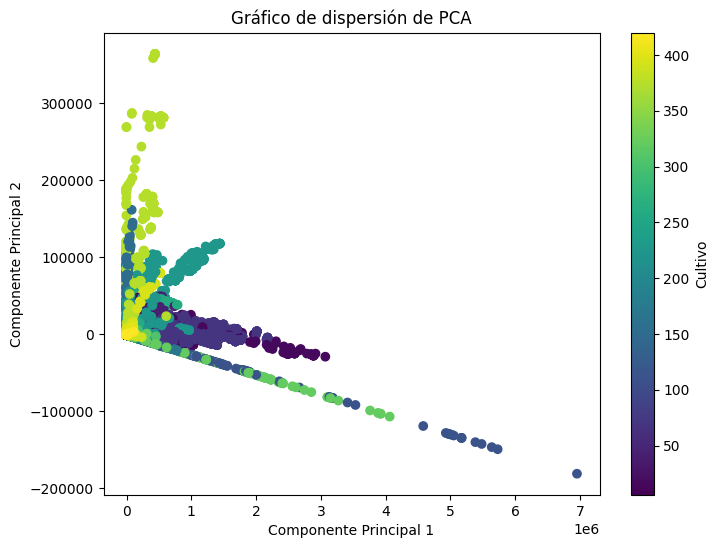

In [131]:
# Supongamos que tus componentes principales se llaman "PC1" y "PC2"
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['PC1'], merged_df['PC2'], c=merged_df['Cultivo'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de dispersión de PCA')

plt.colorbar(label='Cultivo')
plt.show()


### Conclusiones

Se procesaron los datos previamente descargados y preprocesados en formato Tidy del Servicio de Información Agroalimentaria y Pesquera (SIAP) para facilitar la visualización mediante la aplicación de la reducción de dimensionalidad con el Análisis de Componentes Principales (PCA).

<br>

#### Procedimiento

1. **Descarga del archivo:** Se descargó el archivo `/Tidy/SIAP.parquet`.
2. **Modificación de tipo de variables:** Se identificó que las columnas *Superficie Sembrada*, *Superficie Cosechada*, *Superficie Siniestrada*, *Producción* y *Rendimiento* tenían un tipo de dato objeto, por lo que se ajustaron a tipo flotante.
3. **PCA:** Se aplicó el método PCA a las columnas mencionadas para calcular dos componentes principales. Este proceso generó un nuevo DataFrame con estas dos columnas y la varianza explicada por cada componente principal.
4. **Unión de los datos:** Se realizó un merge del DataFrame original con el DataFrame de los componentes principales.
5. **Visualización de los componentes principales:** Se representaron gráficamente los componentes principales, utilizando la columna *Cultivo* como escala de color.

<br>

#### Resultados

La aplicación del PCA resultó en la obtención de dos componentes principales, que representan combinaciones lineales de las variables originales. Además, se obtuvo la varianza explicada por cada componente principal:

<div align="center">

| Componente Principal | Varianza    |
|----------------------|-------------|
| PC1                  | 0.99492654  |
| PC2                  | 0.00443579  |

</div>

##### Interpretación de los Componentes Principales:

- **Primer Componente Principal (PC1):** Explica la mayor parte de la variabilidad en los datos, con una varianza cercana al 99.5%. Se presume que este componente puede estar relacionado con las direcciones principales de variabilidad en las variables originales.

- **Segundo Componente Principal (PC2):** Explica una cantidad significativamente menor de la variabilidad total, alrededor del 0.44%. PC2 captura patrones secundarios o menos dominantes en los datos. Aunque su contribución es baja en comparación con PC1, aún podría contener información relevante.

La visualización gráfica revela patrones, aunque su interpretación requeriría la aplicación de diversas técnicas y la consulta de expertos en el tema.


## SNIIM

### Lectura de datos

In [186]:
df_sniim = pd.read_parquet('../Tidy/SNIIM.parquet')

In [187]:
missing_values = df_sniim.isnull().sum()
missing_values

Fecha               0
Presentacion        0
Origen              0
Destino             0
Precio Minimo       0
Precio Maximo       0
Precio Frecuente    0
Observacion         0
Cultivo             0
dtype: int64

In [188]:
df_sniim.sample(5)

,Fecha,Presentacion,Origen,Destino,Precio Minimo,Precio Maximo,Precio Frecuente,Observacion,Cultivo
502123,10/03/2023,Kilogramo,Michoacán,Michoacán: Mercado de Abasto de Morelia,30.00,35.00,35.0,nan,mamey_primera
300895,22/04/2022,Docena,Puebla,México: Central de Abasto de Ecatepec,17.00,20.00,17.0,nan,coliflor grande_primera
241031,10/12/2019,Kilogramo,Zacatecas,Michoacán: Mercado de Abasto de Morelia,70.00,80.00,80.0,nan,chile puya seco_primera
878846,30/11/2018,Costal de 20 kg.,Zacatecas,Aguascalientes: Centro Comercial Agropecuario ...,4.75,5.25,5.0,nan,zanahoria leña_primera
604982,12/07/2018,Kilogramo,Tamaulipas,"Tamaulipas: Módulo de Abasto de Tampico, Mader...",10.00,10.50,10.5,nan,naranja march grande_primera


### Modificación de tipo de datos

In [189]:
df_sniim.dtypes

Fecha                object
Presentacion         object
Origen               object
Destino              object
Precio Minimo       float64
Precio Maximo       float64
Precio Frecuente    float64
Observacion          object
Cultivo              object
dtype: object

Podemos observar que nuestros datos SNIIM no necesitan cambios en los tipos de variables.

### PCA

In [190]:
# Seleccionar solo las columnas de interés
selected_columns = ['Precio Minimo','Precio Maximo', 'Precio Frecuente']
df_selected = df_sniim[selected_columns]

# Crear un objeto PCA y ajustarlo a los datos
n_components = 2
pca = PCA(n_components=n_components)

pca.fit(df_selected)

# Obtener las componentes principales y la varianza explicada
principal_components = pca.transform(df_selected)
explained_variance = pca.explained_variance_ratio_

# Crear un nuevo DataFrame con las componentes principales
columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
pca_df = pd.DataFrame(data=principal_components, columns=columns)

# Imprimir el DataFrame con las componentes principales
print(pca_df)

# Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
print(explained_variance)

              PC1       PC2
0      -27.733442 -1.343012
1      -27.733442 -1.343012
2      -27.733442 -1.343012
3      -27.733442 -1.343012
4      -27.733442 -1.343012
...           ...       ...
900758  13.816208 -2.560737
900759  13.816208 -2.560737
900760  13.816208 -2.560737
900761  13.816208 -2.560737
900762  13.816208 -2.560737

[900763 rows x 2 columns]
Varianza explicada por cada componente principal:
[0.98890202 0.00887424]


### Unión de los datos

In [193]:
print(pca_df.shape)
print(df_sniim.shape)

(900763, 2)
(900763, 9)


In [191]:
merged_df = pd.merge(df_sniim, pca_df, left_index=True, right_index=True)

### Visualización de Componentes Principales

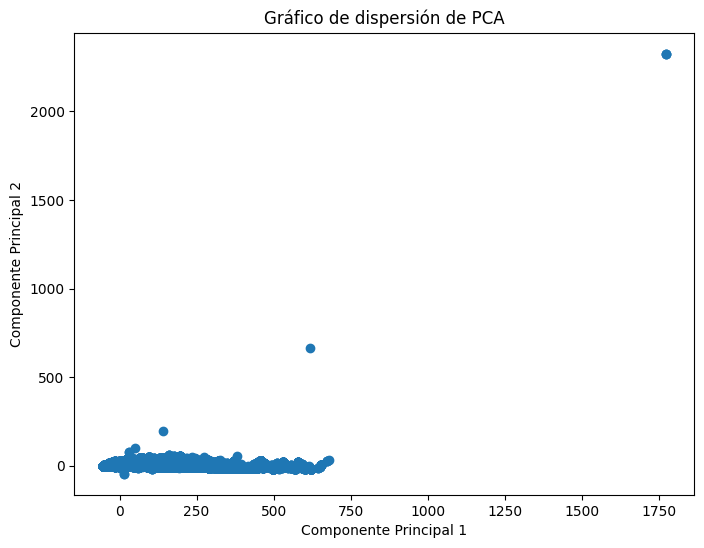

In [192]:
# Supongamos que tus componentes principales se llaman "PC1" y "PC2"
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['PC1'], merged_df['PC2'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de dispersión de PCA')

plt.show()

### Conclusiones

Se procesaron los datos previamente descargados y preprocesados en formato Tidy del Servicio de Información Agroalimentaria y Pesquera (SIAP) para facilitar la visualización mediante la aplicación de la reducción de dimensionalidad con el Análisis de Componentes Principales (PCA).

### Procedimiento:

1. **Descarga del archivo:** Se descargó el archivo `/Tidy/SNIIM.parquet`.
2. **Modificación de tipo de variables:** Se identificó que las columnas *Precio Minimo*, *Precio Maximo*, *Precio Frecuente* tenían el tipo deseado, es decir, flotante.
3. **PCA:** Se aplicó el método PCA a las columnas mencionadas para calcular dos componentes principales. Este proceso generó un nuevo DataFrame con estas dos columnas y la varianza aplicada por cada componente principal.
4. **Unión de los datos:** Se realizó un merge del DataFrame original con el DataFrame de los componentes principales.
5. **Visualización de los componentes principales:** Se representaron gráficamente los componentes principales.

La aplicación del PCA resultó en la obtención de dos componentes principales, que representan combinaciones lineales de las variables originales. Además, se obtuvo la varianza explicada por cada componente principal:

<div align="center">

| Componente Principal | Varianza    |
|----------------------|-------------|
| PC1                  | 0.98890202  |
| PC2                  | 0.00887424  |

</div>

#### Interpretación de los Componentes Principales:

- **Primer Componente Principal (PC1):** Explica la mayor parte de la variabilidad en los datos, con una varianza cercana al 98.9%. Se presume que este componente puede estar relacionado con las direcciones principales de variabilidad en las variables originales.

- **Segundo Componente Principal (PC2):** Explica una cantidad significativamente menor de la variabilidad total, alrededor del 0.89%. PC2 captura patrones secundarios o menos dominantes en los datos. Aunque su contribución es baja en comparación con PC1, aún podría contener información relevante.

La visualización gráfica revela patrones, aunque su interpretación requeriría la aplicación de diversas técnicas y la consulta de expertos en el tema.
